# Libraries

In [1]:
import librosa
# import tensorflow as tf
import scipy.io.wavfile as wav
import librosa.display
import matplotlib.pyplot as plt
import pyaudio
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# from keras import backend as K
from pydub import AudioSegment
from pydub.playback import play
import glob
import keras
from keras.layers import Activation, Dense, Dropout, Conv2D, \
                         Flatten, MaxPooling2D, BatchNormalization,LSTM
import sounddevice as sd
from keras.models import Sequential,load_model
import librosa.util
import numpy as np
import pandas as pd
import random
import soundfile as sf
from ann_visualizer.visualize import ann_viz
from sklearn.model_selection import train_test_split
%matplotlib inline
np.random.seed(2)
# RATE = 22050
# RECORD_SECONDS = 5
# CHUNKSIZE = 1024

# p = pyaudio.PyAudio()
# #Loop
# for i in range(50):
#     stream = p.open(format=pyaudio.paFloat32, channels=1, rate=RATE, input=True, frames_per_buffer=CHUNKSIZE)

#     frames = [] # A python-list of chunks(numpy.ndarray)
#     for _ in range(0, int(RATE / CHUNKSIZE * RECORD_SECONDS)):
#         data = stream.read(CHUNKSIZE)
#         frames.append(numpy.fromstring(data, dtype=numpy.float32))

#     #Convert the list of numpy-arrays into a 1D array (column-wise)
#     numpydata = numpy.hstack(frames)

#     # close stream
#     stream.stop_stream()
#     wav.write('n'+str(i)+'.wav',RATE,numpydata)
#     print("Sample_number: ",i)
# stream.close()
# p.terminate()
output_res = ['Alarm','Noise']

Using TensorFlow backend.


In [11]:
# y, sr = librosa.load('n3.wav', duration=4)
# print(y.shape)
# ps = librosa.feature.melspectrogram(y=y, sr=22050)
# librosa.display.specshow(ps, y_axis='mel', x_axis='time')
# ps = librosa.feature.melspectrogram(y=y, sr=sr)
# ps.shape

# Data_Preprocessing

In [3]:
# # y, sr = librosa.load('n34.wav', duration=4)
# # ps = librosa.feature.melspectrogram(y=y, sr=sr)
D = []
count = 0
for i in glob.iglob('*.wav'):
    y,sr = librosa.load(i, duration=2.97)
    ps = librosa.feature.melspectrogram(y=y, sr=sr)
    D.append(ps)
    count+=1

print('Datasets_available:',count)

Datasets_available: 756


In [5]:
data_set = []
scaler = StandardScaler()
for data in D:
    data = scaler.fit_transform(data).reshape(128,128,1)
    data_set.append(data)
    
data_set = np.asarray(data_set)

print(data_set.shape)

(756, 128, 128, 1)


In [6]:
data_set = np.array([x.reshape( (128, 128, 1) ) for x in data_set])
data_set.shape

(756, 128, 128, 1)

In [7]:
labels = []
for file in glob.iglob('*.wav'):
    if(file[0]=='n'):
        labels.append([0,1])
    elif(file[0]=='d'):
        labels.append([1,0])
labels = np.asarray(labels)
len(labels)

756

# Test_Train_Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    data_set, labels, test_size=0.33,random_state = 42)

In [20]:
# #To see output in each layer
# outputs = [layer.output for layer in model.layers]

In [26]:
# model = []
ann_viz(model)

In [11]:
model = Sequential()
input_shape=(128, 128, 1)

model.add(Conv2D(4, (5, 5), strides=(1, 1), input_shape=input_shape))
model.add(MaxPooling2D((4, 4)))
model.add(Activation('relu'))

model.add(Conv2D(1, (5, 5), padding="valid"))
model.add(MaxPooling2D((4, 4)))
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(6))
# model.add(Activation('sigmoid'))
model.add(Activation('relu'))

# model.add(Dense(4))
# model.add(Activation('relu'))
# model.add(Activation('sigmoid'))

model.add(Dense(2))
model.add(Activation('sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 124, 124, 4)       104       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 4)         0         
_________________________________________________________________
activation_5 (Activation)    (None, 31, 31, 4)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 27, 27, 1)         101       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 1)           0         
_________________________________________________________________
activation_6 (Activation)    (None, 6, 6, 1)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 36)                0         
__________

Train on 506 samples, validate on 250 samples
Epoch 1/15
506/506 [==============================] - 5s 9ms/step - loss: 0.6929 - acc: 0.5543 - val_loss: 0.6192 - val_acc: 0.6780
Epoch 2/15
506/506 [==============================] - 4s 9ms/step - loss: 0.5522 - acc: 0.6927 - val_loss: 0.4585 - val_acc: 0.7420
Epoch 3/15
506/506 [==============================] - 4s 9ms/step - loss: 0.4298 - acc: 0.7273 - val_loss: 0.3685 - val_acc: 0.7640
Epoch 4/15
506/506 [==============================] - 5s 9ms/step - loss: 0.3695 - acc: 0.7322 - val_loss: 0.3274 - val_acc: 0.7640
Epoch 5/15
506/506 [==============================] - 5s 9ms/step - loss: 0.3353 - acc: 0.7391 - val_loss: 0.3019 - val_acc: 0.7780
Epoch 6/15
506/506 [==============================] - 4s 9ms/step - loss: 0.3130 - acc: 0.7589 - val_loss: 0.2839 - val_acc: 0.8040
Epoch 7/15
506/506 [==============================] - 5s 10ms/step - loss: 0.2967 - acc: 0.7915 - val_loss: 0.2694 - val_acc: 0.8280
Epoch 8/15
506/506 [=========

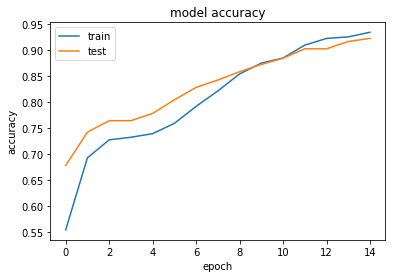

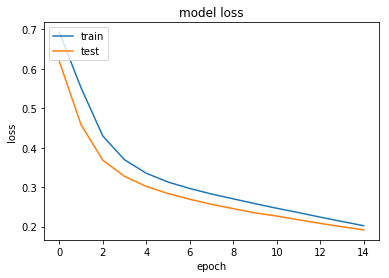

Test loss: 0.191570889473
Test accuracy: 0.921999999046


In [12]:
model.compile(
            optimizer="Adam",
            loss="binary_crossentropy",
            metrics=['accuracy'])

history = model.fit(
        x=X_train, 
        y=y_train,
        epochs=15,
        batch_size=15,
        validation_data= (X_test, y_test))

score = model.evaluate(
        x=X_test,
        y=y_test)

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [13]:
model.save('current_model.h5')
# model = load_model('my_model.h5')
# model.save_weights('my_model_weights.h5')
# model.load_weights('my_model_weights.h5')
# model.predict(np.array([a[0],]))

In [36]:
from sklearn.metrics import f1_score
f1_score(, y_pred, average='macro') 

# Testing

In [28]:
%%time
RATE = 22050
RECORD_SECONDS = 3.97
CHUNKSIZE = 1024
my_model = load_model('current_model.h5')
p = pyaudio.PyAudio()

#Loop
timeesz = 0
while True:
    stream = p.open(format=pyaudio.paFloat32, channels=1, rate=RATE, input=True, frames_per_buffer=CHUNKSIZE)

    frames = [] # A python-list of chunks(numpy.ndarray)

    for _ in range(0, int(RATE / CHUNKSIZE * RECORD_SECONDS)):
        data = stream.read(CHUNKSIZE)
        frames.append(np.fromstring(data, dtype=np.float32))

    #Convert the list of numpy-arrays into a 1D array (column-wise)
    numpydata = np.hstack(frames)

    # close stream
    stream.stop_stream()
    wav.write('p'+str(1000)+'.wav',RATE,numpydata)
    
#     t = time.time()
    y,sr = librosa.load('p'+str(1000)+'.wav', duration=2.97)
    ps = librosa.feature.melspectrogram(y=y, sr=sr)
    ps = ps.reshape(128,128,1)
    predictions = my_model.predict(np.array([ps,]))
#     print(time.time()-t,'secs')
    print("Predictions:",predictions)
#     print(output_res[np.argmax(predictions)])
    confidence = predictions[0][0]*100
    print(confidence)
    if(confidence>=85):
#         print('Beep Sounds')
        timeesz +=1
        onset_env = librosa.onset.onset_strength(y=y, sr=22050,
                                                         hop_length=512,
                                                         aggregate=np.median)

        peaks = librosa.util.peak_pick(onset_env, 3, 3, 3, 5, 0.5, 35)
#         print(peaks,end="")
        times = librosa.frames_to_time(np.arange(len(onset_env)),
                                   sr=sr, hop_length=512)
    #     #     wait = 100
        if(len(peaks)==0 or len(peaks)==1):
            print('\nAbnormal as number of peaks detected is ',format(len(peaks)))
        else:
            val = times[peaks]
#             print(val)
            if(val[1]-val[0]<=1 or len(peaks)>=4):
#                 engine.say('Alarm Sound Detected')
#                 engine.runAndWait()
                print('Alarm Sound')
                time.sleep(0.6)
            else:
                print('Normal Beeps')
        #     plt.figure()
        #     ax = plt.subplot(2, 1, 2)
        #     D = librosa.stft(numpydata)
        #     librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
        #                              y_axis='log', x_axis='time')
        #     plt.subplot(2, 1, 1, sharex=ax)
        #     plt.plot(times, onset_env, alpha=0.8, label='Onset strength')
        #     plt.vlines(times[peaks], 0,
        #                onset_env.max(), color='r', alpha=0.8,
        #                label='Selected peaks')
        #     plt.legend(frameon=True, framealpha=0.8)
        #     plt.axis('tight')
        #     plt.tight_layout()
        #         break
    else:
        print('Noise')
    if(timeesz==10):
        break
        
stream.close()
p.terminate()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [109]:
# ps = ps.reshape(128,128,1)
# predictions = model.predict(np.array([ps,]))
# print("Predictions:",predictions,'\n',
#      output_res[np.argmax(predictions)])

In [ ]:

while True:
    stream = p.open(format=pyaudio.paFloat32, channels=1, rate=RATE, input=True, frames_per_buffer=CHUNKSIZE)

    frames = [] # A python-list of chunks(numpy.ndarray)
    for _ in range(0, int(RATE / CHUNKSIZE * RECORD_SECONDS)):
        data = stream.read(CHUNKSIZE)
        frames.append(numpy.fromstring(data, dtype=numpy.float32))

    #Convert the list of numpy-arrays into a 1D array (column-wise)
    numpydata = numpy.hstack(frames)

    # close stream
    stream.stop_stream()
    stream.close()
#     p.terminate()
#     wav.write('out.wav',RATE,numpydata)
#     y, sr = librosa.load('out.wav', duration=3)
    onset_env = librosa.onset.onset_strength(y=numpydata, sr=sr,
                                                 hop_length=512,
                                                 aggregate=np.median)
    peaks = librosa.util.peak_pick(onset_env, 0, 10, 0,10, 0.5, wait=50)
#     print(peaks,end="")
    times = librosa.frames_to_time(np.arange(len(onset_env)),
                               sr=sr, hop_length=512)
#     wait = 100
    if(len(peaks)==0 or len(peaks)==1):
        print('\nAbnormal as number of peaks detected is ',format(len(peaks)))
    else:
        val = times[peaks]
        if(val[1]-val[0]<=1 or len(peaks)>=4 and max(peaks)<200):
            print('\nCondn: abnormal!!!!!!!!!!')
            
        else:
#             print('normal')
            pass
    
#     if(len(peaks)!=0):
#         plt.figure()
#         ax = plt.subplot(2, 1, 2)
#         D = librosa.stft(numpydata)
#         librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
#                                  y_axis='log', x_axis='time')
#         plt.subplot(2, 1, 1, sharex=ax)
#         plt.plot(times, onset_env, alpha=0.8, label='Onset strength')
#         plt.vlines(times[peaks], 0,
#                    onset_env.max(), color='r', alpha=0.8,
#                    label='Selected peaks')
#         plt.legend(frameon=True, framealpha=0.8)
#         plt.axis('tight')
#         plt.tight_layout()
#         break

# Data Augmentation

In [112]:
rate = 0.81 # replace with 0.81 and execute again
count = 137
for row in glob.iglob('*.wav'):
    count+=1
    y, sr = librosa.load(row)
    y_changed = librosa.effects.time_stretch(y, rate=rate)
    if(row[0]=='d'):
        librosa.output.write_wav('d_changed'+str(count)+'.wav' ,y_changed, sr)
#         print("d")
    elif(row[0]=='n'):
        librosa.output.write_wav('n_changed'+str(count)+'.wav' ,y_changed, sr)
#         print("n")
#     if(count==140):
    break

In [166]:
count = 1

file_names = glob.glob('*.wav')
data = []

for file in file_names:
    if(file[0]=='d'):
        parent_data,sr = librosa.load(file,sr=22050,duration=4)
#         print(parent_data.shape)
        #Adding Noise
        wn = np.random.randn(len(parent_data))
        data_wn = parent_data + 0.005*wn
        #Stretching with time
        data_time = librosa.effects.time_stretch(y=parent_data, rate=0.81)
        wav.write('dstretch'+str(count)+'.wav',rate=22100, data=data_time)
        #Pitch_shift
        pitch_shift_data = librosa.effects.pitch_shift(parent_data, sr=22050, n_steps=2)
        wav.write('dpitch'+str(count)+'.wav',rate=22100, data=pitch_shift_data)
        #Roll
        data_roll = np.roll(parent_data, 1600)
        wav.write('droll'+str(count)+'.wav',rate=22100, data=data_roll)
        count+=1
    elif(file[0]=='n'):
        parent_data,sr = librosa.load(file,sr=22050,duration=4)
#         print(parent_data.shape)
        #Adding Noise
        wn = np.random.randn(len(parent_data))
        data_wn = parent_data + 0.005*wn
        #Stretching with time
        data_time = librosa.effects.time_stretch(y=parent_data, rate=0.81)
        wav.write('nstretch'+str(count)+'.wav',rate=22100, data=data_time)
        #Pitch_shift
        pitch_shift_data = librosa.effects.pitch_shift(parent_data, sr=22050, n_steps=2)
        wav.write('npitch'+str(count)+'.wav',rate=22100, data=pitch_shift_data)
        #Roll
        data_roll = np.roll(parent_data, 1600)
        wav.write('nroll'+str(count)+'.wav',rate=22100, data=data_roll)
        count+=1
    

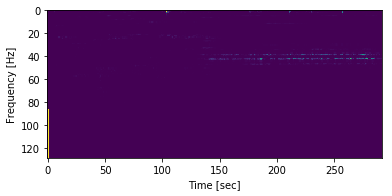

In [51]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
stream = p.open(format=pyaudio.paFloat32, channels=1, rate=RATE, input=True, frames_per_buffer=CHUNKSIZE)

frames = [] # A python-list of chunks(numpy.ndarray)
for _ in range(0, int(RATE / CHUNKSIZE * 3)):
    data = stream.read(CHUNKSIZE)
    frames.append(np.fromstring(data, dtype=np.float32))

#Convert the list of numpy-arrays into a 1D array (column-wise)
numpydata = np.hstack(frames)
sample_rate, samples = wavfile.read('d4.wav')
frequencies, times, spectrogram = signal.spectrogram(numpydata, sample_rate)

plt.pcolormesh(times, frequencies, spectrogram)
plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [78]:
np.amax(x_train)

11.100129644003733

In [23]:
import pyttsx3
engine = pyttsx3.init()
for i in range(4):
    engine.say("Alarm Sound")
    time.sleep(2)
engine.runAndWait()